In [1]:
pip install imutils

Note: you may need to restart the kernel to use updated packages.


In [2]:
import tensorflow as tf
import os
import glob
from tensorflow.keras.layers import Conv2D, Input, ZeroPadding2D, BatchNormalization, Activation, MaxPooling2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from tensorflow.keras.preprocessing import image
from sklearn.model_selection import train_test_split
from keras.utils.vis_utils import plot_model
from keras.models import Sequential
from sklearn.metrics import f1_score
import matplotlib.image as mpimg
from sklearn.utils import shuffle
import cv2 as cv
import numpy as np
import imutils
import matplotlib.pyplot as plt
import time
from os import listdir
from os.path import isfile, join
from PIL import Image
from matplotlib.pyplot import imshow
%matplotlib inline

In [3]:
path = r"C:\Users\DELL\Desktop\mri dataset\Training\\"
gt = path + 'glioma_tumor'
mt = path + 'meningioma_tumor'
nt = path + 'no_tumor'
pt = path + 'pituitary_tumor'
dir_list = [gt, mt, nt, pt]


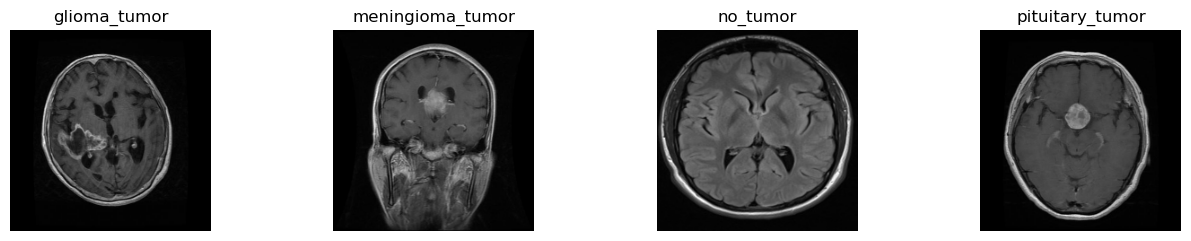

In [4]:
plt.figure(figsize=(16, 12))
h, w = 224, 224
path = r"C:\Users\DELL\Desktop\mri dataset\Training\\"
fileNames = [r"glioma_tumor\gg (18).jpg", r"meningioma_tumor\m (26).jpg", r"no_tumor\image (20).jpg", r"pituitary_tumor\p (22).jpg"]
fileLabels = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

for i in range(4):
    ax = plt.subplot(4, 4, i + 1)
    img = mpimg.imread(path + fileNames[i])
    img = cv.resize(img, (h, w))
    plt.imshow(img)
    plt.title(fileLabels[i])
    plt.axis("off")

CROP BRAIN TUMOR

In [5]:
def crop_brain_contour(image):
    
    gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    gray = cv.GaussianBlur(gray, (5, 5), 0)

    thresh = cv.threshold(gray, 45, 255, cv.THRESH_BINARY)[1]
    thresh = cv.erode(thresh, None, iterations=2)
    thresh = cv.dilate(thresh, None, iterations=2)

    cnts = cv.findContours(thresh.copy(), cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    c = max(cnts, key=cv.contourArea)
    


    extLeft = tuple(c[c[:, :, 0].argmin()][0])
    extRight = tuple(c[c[:, :, 0].argmax()][0])
    extTop = tuple(c[c[:, :, 1].argmin()][0])
    extBot = tuple(c[c[:, :, 1].argmax()][0])

    new_image = image[extTop[1]:extBot[1], extLeft[0]:extRight[0]]            

    
    return new_image

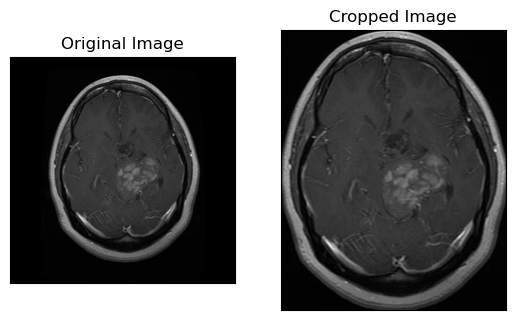

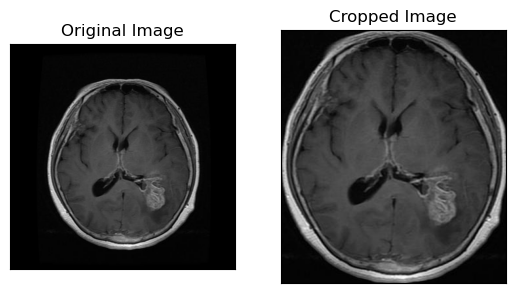

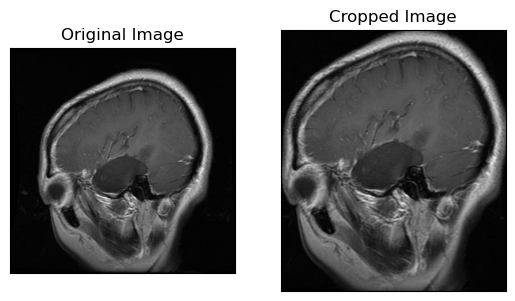

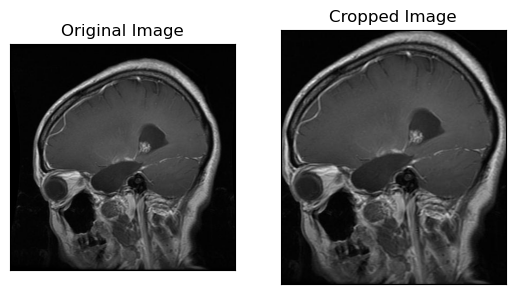

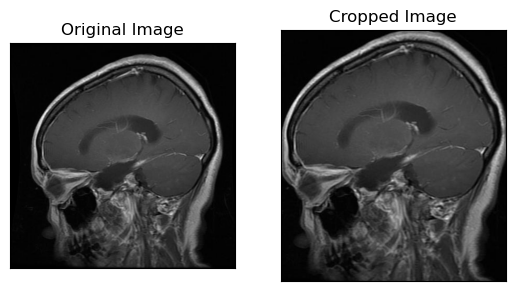

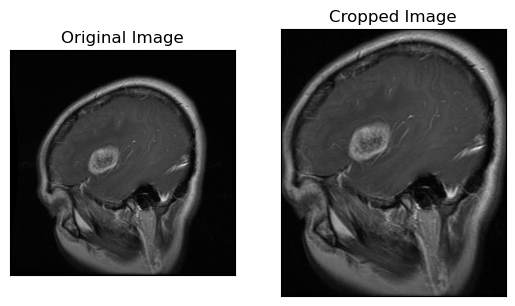

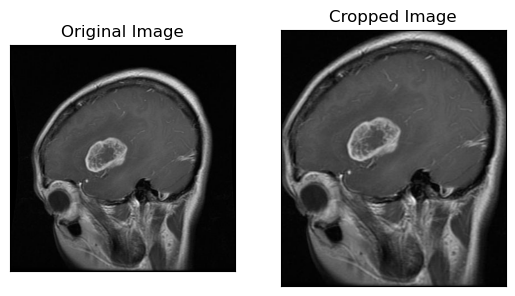

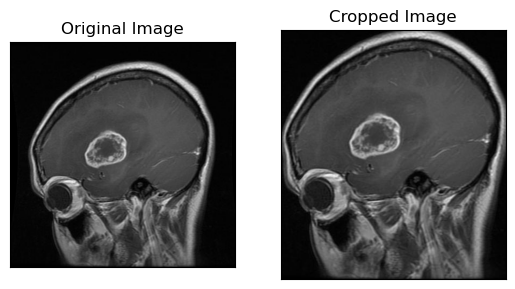

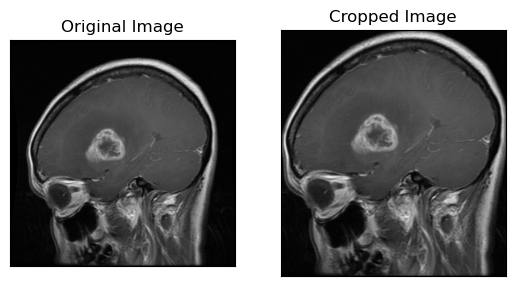

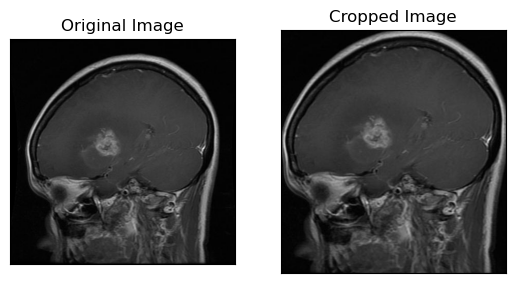

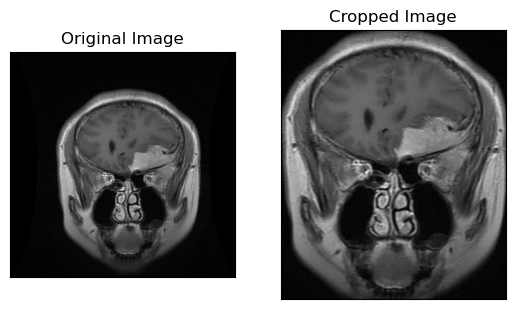

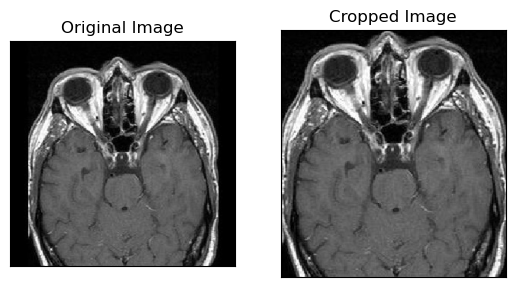

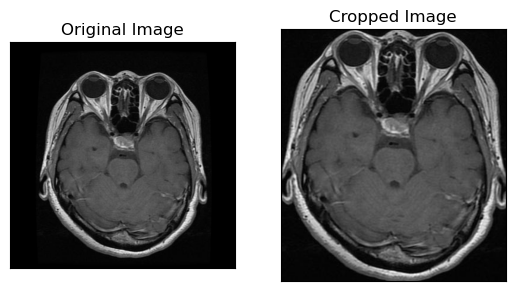

In [6]:
max_size=10
temp_size=0
for directory in dir_list:
 for images in os.listdir(directory):
  ex_img = cv.imread(os.path.join(directory,images)) #CROP
  ex_new_img=crop_brain_contour(ex_img)
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(ex_img)
  plt.tick_params(axis='both', which='both', top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
  plt.title('Original Image')
  plt.subplot(1, 2, 2)
  plt.imshow(ex_new_img)
  plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False,labelleft=False, labelright=False)
  plt.title('Cropped Image')
  plt.show()
  temp_size+=1
  if temp_size >= max_size:
    break


# NLM

In [7]:
def NLM(img,out,h,templateWindowSize,searchWindowSize):
  dst=cv.fastNlMeansDenoising(img,None,h,templateWindowSize,searchWindowSize)
  return dst

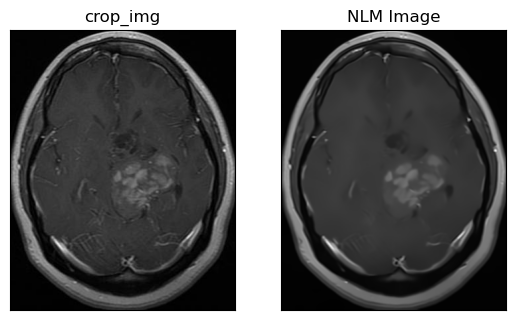

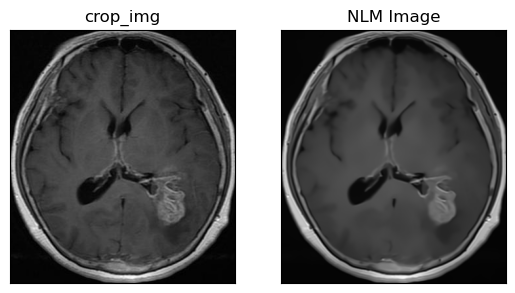

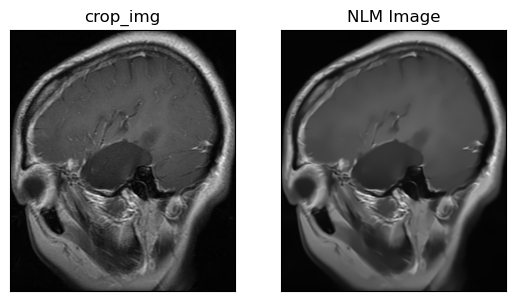

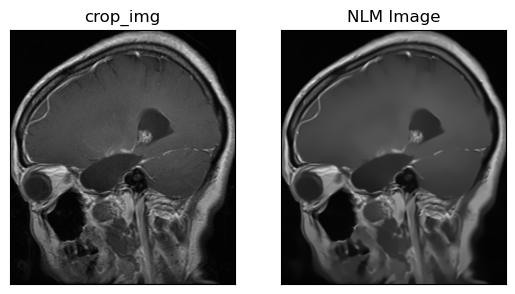

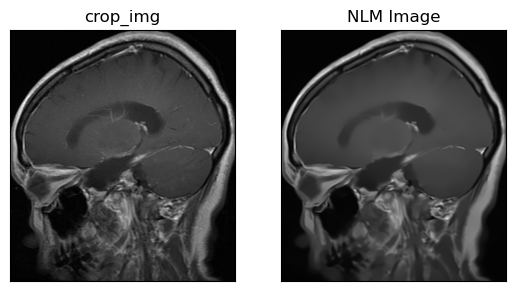

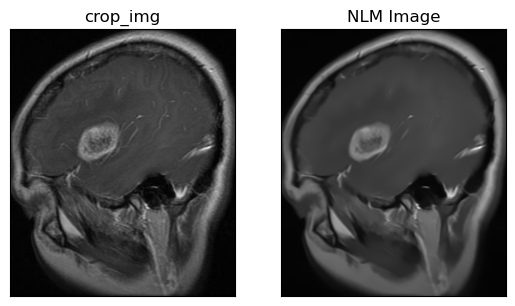

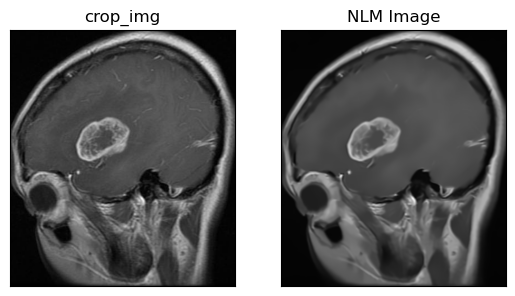

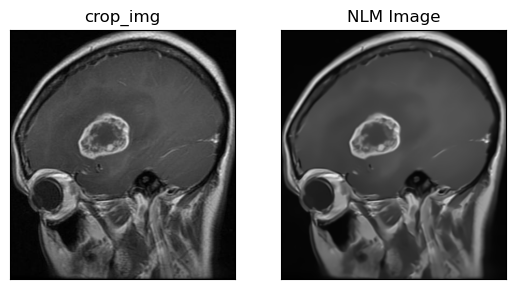

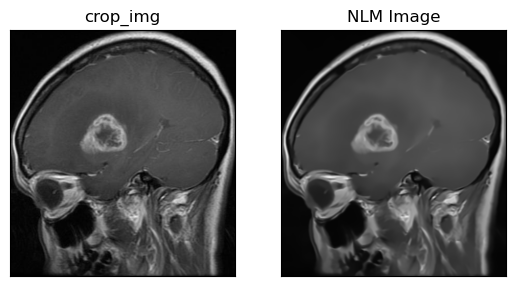

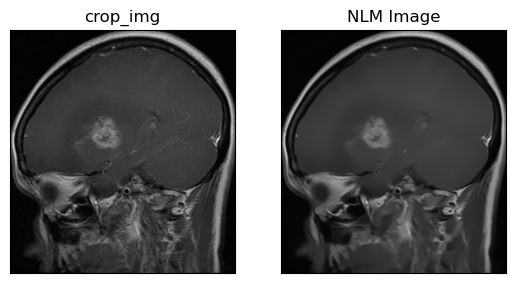

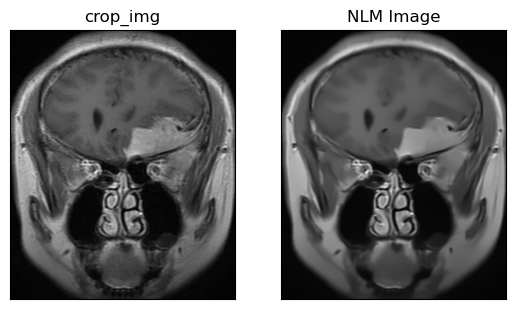

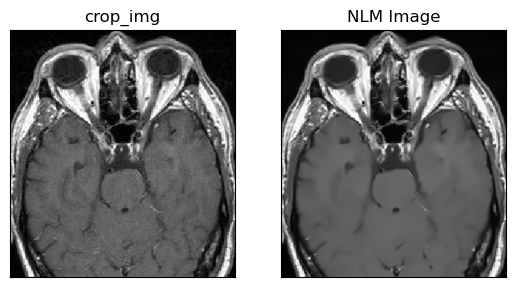

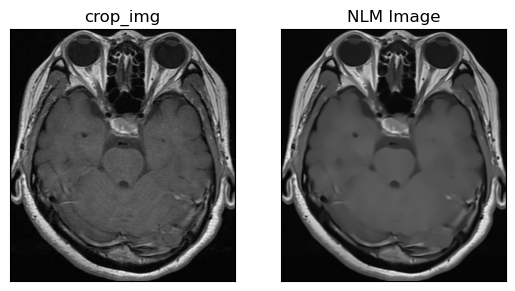

In [8]:
max_size=10
temp_size=0
for directory in dir_list:
 for images in os.listdir(directory):
  ex_img = cv.imread(os.path.join(directory,images))
  crop_img=crop_brain_contour(ex_img)
  nlm_img=NLM(crop_img,None,10,7,21)
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(crop_img)
  plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False,labelleft=False, labelright=False)
  plt.title('crop_img')
  plt.subplot(1, 2, 2)
  plt.imshow(nlm_img)
  plt.tick_params(axis='both', which='both',top=False, bottom=False, left=False, right=False,labelbottom=False, labeltop=False, labelleft=False, labelright=False)
  plt.title('NLM Image')
  plt.show()
  temp_size+=1
  if temp_size >= 10:
    break

# Histogram Equalization

In [9]:
def his(img):                #HIS
  equ = cv.equalizeHist(img)
  return equ

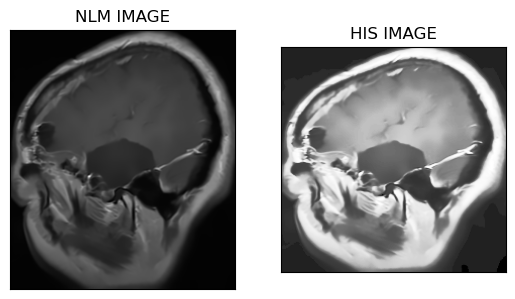

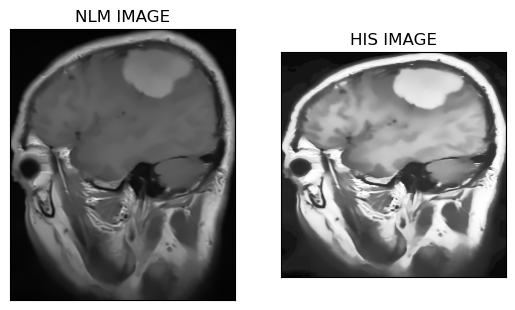

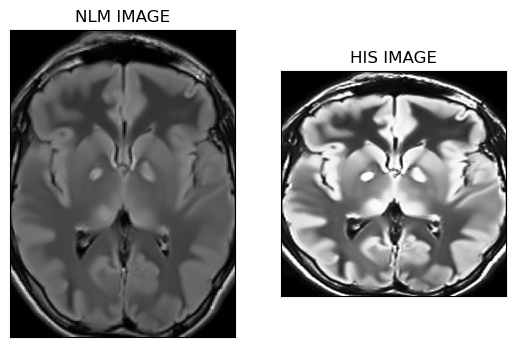

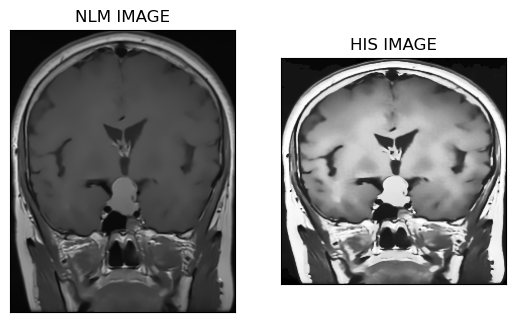

In [10]:
max_size=10
temp_size=0
for directory in dir_list:
  for images in os.listdir(directory):
   ex_img = cv.imread(os.path.join(directory,images))
  crop_img=crop_brain_contour(ex_img)
  nlm_img=NLM(crop_img,None,10,7,21)
  ex_new_img=cv.cvtColor(nlm_img, cv.COLOR_BGR2GRAY)
  his_img=his(ex_new_img)
  his_img = cv.resize(his_img, dsize=(224, 224), interpolation=cv.INTER_CUBIC)
  plt.figure()
  plt.subplot(1, 2, 1)
  plt.imshow(nlm_img)
  plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
  plt.title('NLM IMAGE')
  plt.subplot(1, 2, 2)
  ex_new_img=cv.cvtColor(his_img, cv.COLOR_GRAY2BGR)
  plt.imshow(ex_new_img)
  plt.tick_params(axis='both', which='both', 
                        top=False, bottom=False, left=False, right=False,
                        labelbottom=False, labeltop=False, labelleft=False, labelright=False)
  plt.title('HIS IMAGE')
  plt.show()
  temp_size+=1
  if temp_size >= max_size:
    break

In [11]:
X_train = []
y_train = []
image_size = 224

In [12]:
train_path = r"C:\Users\DELL\Desktop\mri dataset\Training\\"
labels = os.listdir(train_path)
print(labels)

['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']


In [13]:
for i in labels:
    folder_path = os.path.join(train_path, i)
    for j in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, j),target_size=(224,224)) 
        img = img_to_array(img) 
        X_train.append(img)
        y_train.append(i)

In [14]:
test_path = r"C:\Users\DELL\Desktop\mri dataset\Testing\\"

In [15]:
for i in labels:
    folder_path = os.path.join(test_path, i)
    for j in os.listdir(folder_path):
        img = load_img(os.path.join(folder_path, j),target_size=(224,224)) 
        img = img_to_array(img)
        X_train.append(img)
        y_train.append(i)

In [16]:
X_train[1]

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [17]:
len(X_train), len(y_train)

(3264, 3264)

In [18]:
X_train = np.array(X_train)
y_train = np.array(y_train)

In [19]:
X_train.shape, y_train.shape

((3264, 224, 224, 3), (3264,))

In [20]:
print ("number of training examples = " + str(X_train.shape[0]))
print ("X_train shape: " + str(X_train.shape))
print ("Y_train shape: " + str(y_train.shape))

number of training examples = 3264
X_train shape: (3264, 224, 224, 3)
Y_train shape: (3264,)


In [21]:
X_train, y_train = shuffle(X_train, y_train, random_state = 99)
X_train.shape, y_train.shape

((3264, 224, 224, 3), (3264,))

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state = 100)

In [23]:
y_train[:5]

array(['meningioma_tumor', 'meningioma_tumor', 'pituitary_tumor',
       'meningioma_tumor', 'meningioma_tumor'], dtype='<U16')

In [24]:
y_train_new = []
for i in y_train:
    y_train_new.append(labels.index(i))

y_train_new[:5]

[1, 1, 3, 1, 1]

In [25]:
y_train_new = tf.keras.utils.to_categorical(y_train_new)
y_train_new

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       ...,
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [26]:
y_test_new = []
for i in y_test:
    y_test_new.append(labels.index(i))

y_test_new = tf.keras.utils.to_categorical(y_test_new)
y_test_new

array([[0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       ...,
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [27]:
IMG_SHAPE = (224, 224, 3)

In [28]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))


model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))

model.add(Flatten())

model.add(Dense(1024, activation = 'relu'))
model.add(Dropout(0.7))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.5))
model.add(Dense(4, activation = 'softmax'))

In [29]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [30]:
model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'Adam',
    metrics = ['accuracy']
)

In [ ]:
hist = model.fit(X_train, y_train_new, epochs = 10, validation_split = 0.2)

Epoch 1/10
 3/74 [>.............................] - ETA: 21:13 - loss: 1.3074 - accuracy: 0.3438

In [ ]:
model.save("Brain_Tumor_model.h5")

In [ ]:
acc = hist.history['accuracy']
val_acc = hist.history['val_accuracy']

loss = hist.history['loss']
val_loss = hist.history['val_loss']

epochs_range = range(len(hist.history['accuracy']))

plt.figure(figsize=(18, 6))
plt.subplot(1, 2, 1)
plt.plot(range(len(hist.history['accuracy'])), acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='upper right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model

In [ ]:
model = load_model('Brain_Tumor_model.h5")


In [ ]:
img_path = cv2.imread(r"C:\Users\DELL\Desktop\mri dataset\Testing\no_tumor\image(53).jpg")

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray = cv2.resize(gray, (128, 128))


In [ ]:
gray = gray / 255.0
gray = np.reshape(gray, (1, 128, 128, 1))

In [ ]:
if prediction > 0.5:
    # Convert the grayscale image to RGB for display
    img = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)

    # Apply Gaussian blur to the image to reduce noise
    img = cv2.GaussianBlur(img, (5, 5), 0)

In [ ]:
#img_path = r"C:\Users\DELL\Desktop\mri dataset\Testing\no_tumor\image(53).jpg"
#img = load_img(img_path,target_size=(224,224)) 
#img = img_to_array(img)
#img_array = img.reshape(1,224,224,3)
#img_array.shape

In [ ]:
#a = model.predict(img_array)
#print(a)
#indices = a.argmax()
#labels[indices]

In [ ]:
 _, thresh = cv2.threshold(img, 0.45, 1, cv2.THRESH_BINARY)

    # Apply a morphology operation to the mask to remove small noise
    kernel = np.ones((3, 3), np.uint8)
    thresh = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel)


In [ ]:
 thresh = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)

    # Apply the mask to the original image to show the tumor in color
    result = cv2.bitwise_and(img, thresh)


In [ ]:
img = load_img(img_path,target_size=(224,224)) 
img = img_to_array(img)
img_array = img.reshape(1,224,224,3)
img_array.shape

In [ ]:
a = model.predict(img_array)
print(a)
indices = a.argmax()
labels[indices]